<a href="https://colab.research.google.com/github/kevinqrnold/DSC410-T301-Predictive-Analytics/blob/main/Kevin_Arnold_Milestone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Milestone 2 -- Data for my project

#### I have chosen to utilize crime statisitics provided by the Omaha Police Department as my first dataset. The data, which is publicly available in csv format on the <a href="https://police.cityofomaha.org/crime-information/incident-data-download" target="_blank" rel="noopener">Omaha Policy Department's website</a>, dates back from 2015 to present day.

#### The data contains information about the date/time of incidents, their location (both physical street address and lat/long), a description of the incident, the police district in which it occurred, along with the incident number.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

#df = pd.read_csv("/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2023.csv")

df = pd.concat(
    map(pd.read_csv, ['/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2015.csv', '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2016.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2017.csv', '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2018.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2019.csv', '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2020.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2021.csv', '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2022.csv',
                      '/content/drive/My Drive/DSC410-T301_Predictive_Analytics/Incidents_2023.csv']), ignore_index=True)





Mounted at /content/drive


In [3]:
df.head()

,RB Number,Reported Date,Reported Time,Statute/Ordinance Description,Occurred Location,Occurred District,Occurred Block LAT,Occurred Block LON
0,AH33823,02/11/2015,17:00:20,SEXUAL ASSAULT,3600 Vinton St,62,41.229331,-95.966287
1,AH95364,04/06/2015,12:00:50,ASSAULT - MISDEMEANOR - NO WEAPON,3800 Redick Ave,31,41.317632,-95.969763
2,AH01901,05/14/2015,10:00:32,CHILD ABUSE BY NEGLECT-NO SER INJURY,3100 N 111th Plz,13,41.286776,-96.084376
3,AH04804,05/15/2015,11:00:00,SEXUAL ASSAULT,5700 S 29th St,67,41.200953,-95.956119
4,AH00018,06/21/2015,13:52:00,CRIMINAL MISCHIEF UNDER $200,8100 Corby St,17,41.284222,-96.039285


In [4]:
df = df.rename(columns={"RB Number": "incident_number", "Reported Date": "incident_date", "Reported Time": "incident_time",
                   "Statute/Ordinance Description": "incident_description", "Occurred Location": "incident_location",
                   "Occurred District": "incident_district", "Occurred Block LAT": "incident_lat",
                   "Occurred Block LON": "incident_long"})
df.head()

,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long
0,AH33823,02/11/2015,17:00:20,SEXUAL ASSAULT,3600 Vinton St,62,41.229331,-95.966287
1,AH95364,04/06/2015,12:00:50,ASSAULT - MISDEMEANOR - NO WEAPON,3800 Redick Ave,31,41.317632,-95.969763
2,AH01901,05/14/2015,10:00:32,CHILD ABUSE BY NEGLECT-NO SER INJURY,3100 N 111th Plz,13,41.286776,-96.084376
3,AH04804,05/15/2015,11:00:00,SEXUAL ASSAULT,5700 S 29th St,67,41.200953,-95.956119
4,AH00018,06/21/2015,13:52:00,CRIMINAL MISCHIEF UNDER $200,8100 Corby St,17,41.284222,-96.039285


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408383 entries, 0 to 408382
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   incident_number       408383 non-null  object 
 1   incident_date         408383 non-null  object 
 2   incident_time         408383 non-null  object 
 3   incident_description  408383 non-null  object 
 4   incident_location     408218 non-null  object 
 5   incident_district     408383 non-null  int64  
 6   incident_lat          331468 non-null  float64
 7   incident_long         331468 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 24.9+ MB


#### Each district in which an incident occurs belongs to one of five segmented precincts:
    -Northwest
    -Northeast
    -Southwest
    -Southeast
    -West

#### I want to add a column that identifies each incident's precinct based on the district so that I may use it for EDA:

In [6]:
precinct = []

for row in df['incident_district']:
    if row in range(11,30): precinct.append('NW') # note range(inclusive, exclusive)
    elif row in range(31, 50) : precinct.append('NE')
    elif row in range(51, 69) : precinct.append('SE')
    elif row in range(71, 90) : precinct.append('SW')
    elif row in range(91, 108) : precinct.append('W')
    else: precinct.append('No Precinct')

df['incident_precinct'] = precinct

df.head()

,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long,incident_precinct
0,AH33823,02/11/2015,17:00:20,SEXUAL ASSAULT,3600 Vinton St,62,41.229331,-95.966287,SE
1,AH95364,04/06/2015,12:00:50,ASSAULT - MISDEMEANOR - NO WEAPON,3800 Redick Ave,31,41.317632,-95.969763,NE
2,AH01901,05/14/2015,10:00:32,CHILD ABUSE BY NEGLECT-NO SER INJURY,3100 N 111th Plz,13,41.286776,-96.084376,NW
3,AH04804,05/15/2015,11:00:00,SEXUAL ASSAULT,5700 S 29th St,67,41.200953,-95.956119,SE
4,AH00018,06/21/2015,13:52:00,CRIMINAL MISCHIEF UNDER $200,8100 Corby St,17,41.284222,-96.039285,NW


              count  percent
NW           110817     27.1
SW            85508     20.9
SE            83008     20.3
NE            79718     19.5
W             36969      9.1
No Precinct   12363      3.0


<Axes: title={'center': 'incident_precinct'}>

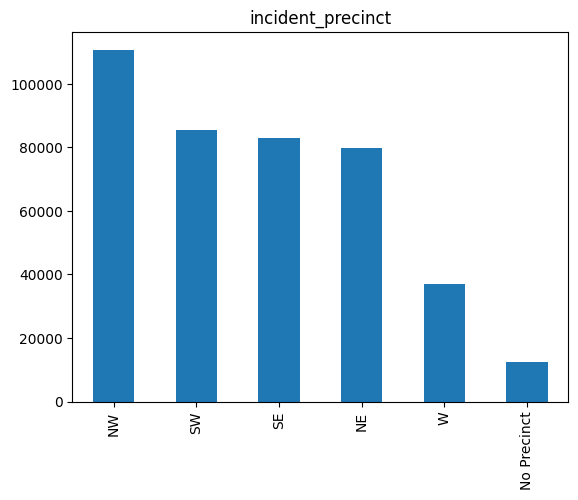

In [7]:
feature = 'incident_precinct'
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
feature_df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(feature_df)
count.plot(kind='bar', title=feature)

#### The 'No Precinct' results above generate from where the incident_district is labeled either 998 or 999 because there is incident_location indicated (entered as 'Unknown'). Because of this, I will separate these results from our dataframe but maintain in order to document how often incomplete incidents are being added.

In [8]:
complete_df = df[df['incident_precinct'] != 'No Precinct']
incomplete_df = df[df['incident_precinct'] == 'No Precinct']
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396020 entries, 0 to 408382
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   incident_number       396020 non-null  object 
 1   incident_date         396020 non-null  object 
 2   incident_time         396020 non-null  object 
 3   incident_description  396020 non-null  object 
 4   incident_location     395923 non-null  object 
 5   incident_district     396020 non-null  int64  
 6   incident_lat          331301 non-null  float64
 7   incident_long         331301 non-null  float64
 8   incident_precinct     396020 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 30.2+ MB


#### Now I will review the various types of crimes to look for patterns by type and the precincts in which they occur.

In [9]:
print(complete_df["incident_description"].nunique())

312


In [10]:
temp = pd.crosstab(complete_df['incident_description'], complete_df['incident_precinct'], margins=True, margins_name='Total')
temp

incident_precinct,NE,NW,SE,SW,W,Total
incident_description,,,,,,
ABUSE VULNERABLE ADULT -EXPLOIT; FRAUD,23,33,23,26,19,124
"ABUSE VULNERABLE ADULT, KNOW & INTENT",6,8,4,10,5,33
AGG ASLT OFFICER/HEALTH CARE WORKER,0,8,8,5,2,23
ANIMAL BITE,72,82,58,50,16,278
ARSON,203,108,113,75,17,516
...,...,...,...,...,...,...
"UNLAWFUL ENTRY/THEFT -GARAGE, OTHER",140,530,168,539,254,1631
UNLAWFUL OCCUPANCY,57,40,94,35,5,231
VIOLATION OF CUSTODY,2,3,2,0,0,7


In [13]:
incident_description_feature = 'incident_description'
incident_description_count = complete_df[incident_description_feature].value_counts()
percent = 100*complete_df[incident_description_feature].value_counts(normalize=True)
incident_description_feature_df = pd.DataFrame({'count':incident_description_count, 'percent':percent.round(3)})
incident_description_feature_df



,count,percent
CRIMINAL MISCHIEF UNDER $500,34649,8.749
THEFT BY UNLAWFUL TAKING $200-$1499,26671,6.735
ASSAULT - MISDEMEANOR - NO WEAPON,25367,6.405
THEFT OF MOTOR VEHICLE - FELONY MV,24247,6.123
THEFT BY SHOPLIFT $500/LESS,21400,5.404
...,...,...
"BAD CHECK-GOODS,SERV $5000/MORE-ATMPT",1,0.000
DENY/INTERFERE W/ADMIT TO PUB FACILITY,1,0.000
"FORGERY, 2ND DEG, $301-$999 -ATTEMPT",1,0.000
"CRIMINAL TRESPASS,2ND DEGREE-HATE CRIME",1,0.000


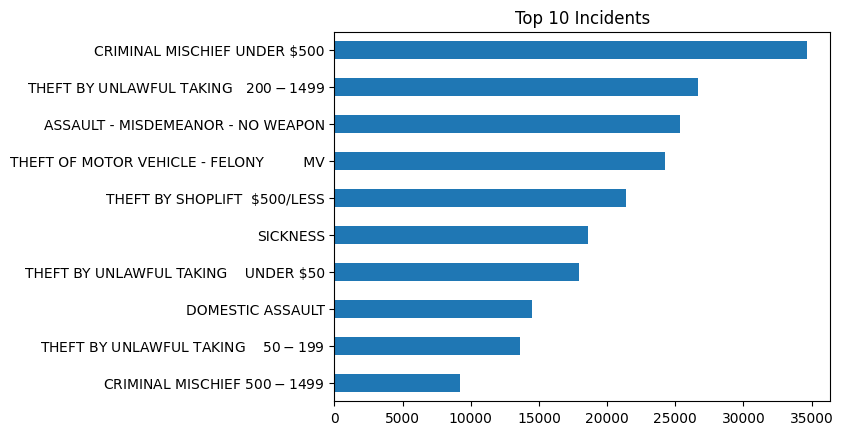

In [48]:
incident_description_count.head(10).plot(kind='barh', title="Top 10 Incidents")
plt.gca().invert_yaxis()

#### Now I'm going to group the data by month and year to see if there are any trends year over year.

In [16]:
complete_df['incident_date'] = pd.to_datetime(complete_df['incident_date'])
crime_by_month = complete_df.groupby(pd.Grouper(key='incident_date', freq='M')).count()
crime_by_month.reset_index(inplace=True)
crime_by_month

<ipython-input-16-709e1a364992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df['incident_date'] = pd.to_datetime(complete_df['incident_date'])


,incident_date,incident_number,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long,incident_precinct
0,2015-02-28,1,1,1,1,1,1,1,1
1,2015-03-31,0,0,0,0,0,0,0,0
2,2015-04-30,1,1,1,1,1,1,1,1
3,2015-05-31,2,2,2,2,2,2,2,2
4,2015-06-30,1080,1080,1080,1080,1080,1042,1042,1080
...,...,...,...,...,...,...,...,...,...
99,2023-05-31,4716,4716,4716,4709,4716,4679,4679,4716
100,2023-06-30,4659,4659,4659,4654,4659,4618,4618,4659
101,2023-07-31,5273,5273,5273,5264,5273,5224,5224,5273
102,2023-08-31,4727,4727,4727,4715,4727,4672,4672,4727


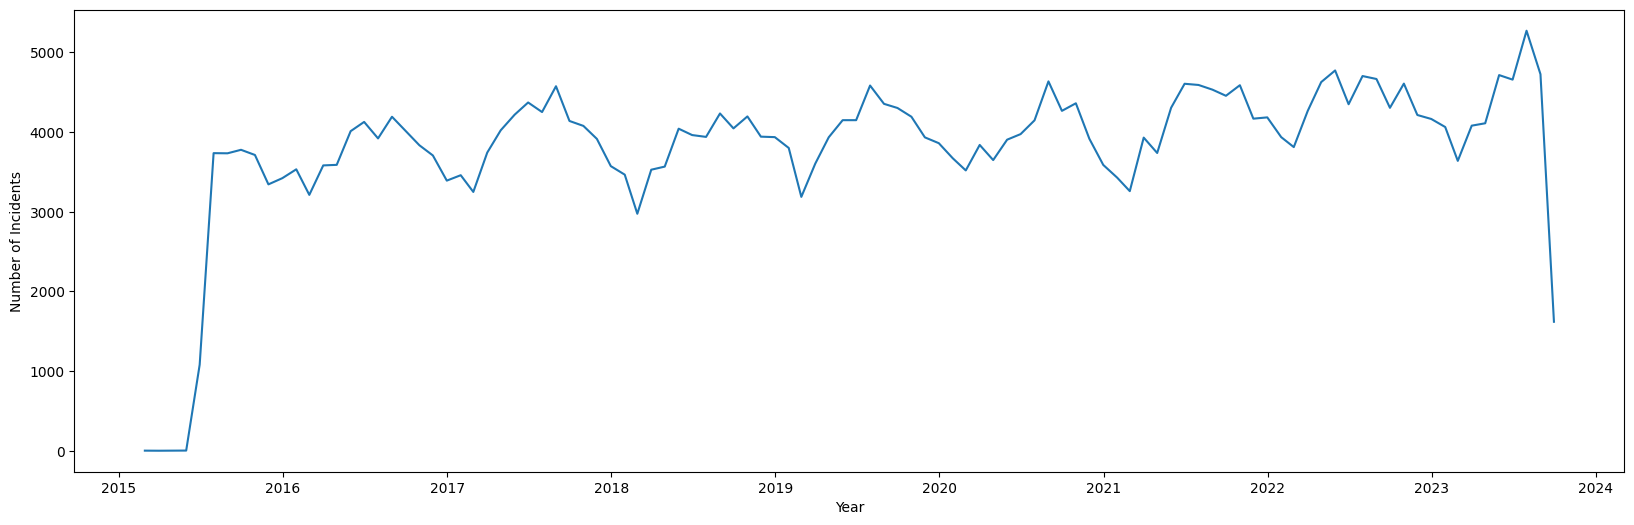

In [42]:
plt.figure(figsize=(20,6))
plt.plot(crime_by_month['incident_date'], crime_by_month['incident_number'])
plt.xlabel("Year")
plt.ylabel("Number of Incidents")

plt.show()

#### There is clearly some sort of trend as far as the ebb and flow of the number of incidents. A first guess would be due to seasonality -- namely weather, and temperature. Also, it doesn't appear there was any spike due to COVID-19 from 2020-2022. Now I'll import the average temperature (from the <a href="https://www.weather.gov/wrh/Climate?wfo=oax">NOAA/NWS website</a>) - each month to compare that to the figure above to see if there's a relationship.

In [18]:
temperature_df = pd.read_csv("/content/drive/My Drive/DSC410-T301_Predictive_Analytics/omaha_temperature_data.csv")
temperature_df = temperature_df.set_index('Year')
temperature_df = temperature_df.drop(columns=['Annual'])
temperature_df


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2015,27.8,20.8,43.7,54.2,61.6,73.4,77.0,73.2,71.6,57.4,45.2,34.1
2016,24.3,34.2,47.5,55.0,63.1,78.7,77.8,75.9,70.8,58.9,47.3,26.9
2017,27.7,37.7,43.3,54.4,63.1,75.7,80.1,72.5,70.6,55.3,40.7,27.4
2018,23.3,24.0,40.3,44.9,70.6,77.6,77.5,76.0,69.4,51.6,33.7,29.6
2019,24.5,17.6,35.5,54.9,62.0,74.2,78.6,75.4,73.6,49,37.4,32.3
2020,26.4,30.8,44.1,51.1,59.8,78.1,79.2,77.2,65.7,49.5,44,29.7
2021,28.5,16.3,46.1,53.2,62.1,77.7,77.7,78.0,71,57.9,44.5,35.9
2022,22.8,28.3,40.7,50.2,64.7,75.0,78.2,76.7,68.9,54.2,37.6,24.3
2023,26.8,30.2,36.5,52.9,66.8,75.5,75.6,76.5,M,M,M,M


In [19]:
#temperature_df = temperature_df.stack()
temperature_df.columns = range(1,13)
s = temperature_df.stack()
year = s.index.get_level_values(0).values
month = s.index.get_level_values(1).values
pd.PeriodIndex(year=year, month=month, freq='M')
s.index = pd.PeriodIndex(year=year, month=month, freq='M')

temperature_df = pd.DataFrame(s)
temperature_df

,0
2015-01,27.8
2015-02,20.8
2015-03,43.7
2015-04,54.2
2015-05,61.6
...,...
2023-08,76.5
2023-09,M
2023-10,M
2023-11,M


In [30]:
#temperature_df = temperature_df.reset_index().rename(columns={0: "temp", "index": "date"})

temperature_df['date'] = temperature_df['date'].astype(str)
temperature_df['date'] = pd.to_datetime(temperature_df['date'])
temperature_df.drop(temperature_df[temperature_df['temp'] == "M"].index, inplace=True)
temperature_df['temp'] = temperature_df['temp'].astype(float)
temperature_df.dtypes


date    datetime64[ns]
temp           float64
dtype: object

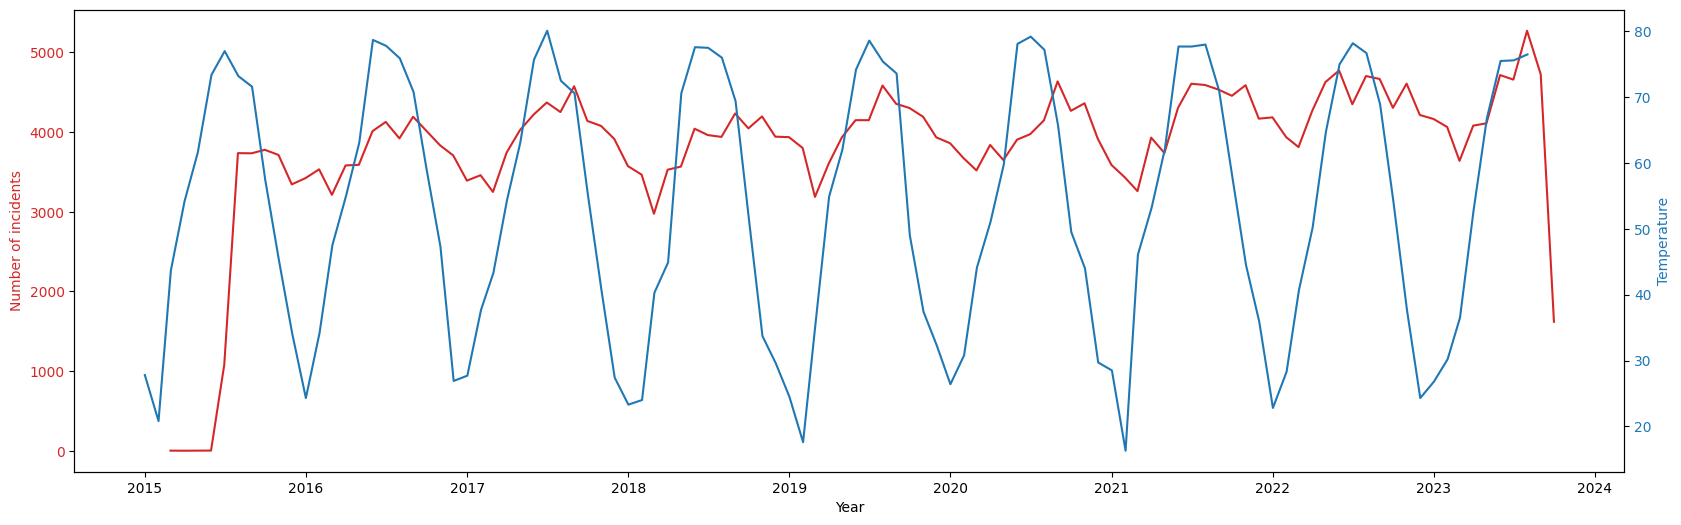

In [41]:
fig, ax1 = plt.subplots(figsize=(20,6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.plot(crime_by_month['incident_date'], crime_by_month['incident_number'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(temperature_df['date'], temperature_df['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

As you can see above, there definitely is a correlation with the number of incidents and the average temperature. The lower the temperature goes, the less number of incidents are recorded.

## In Summary

#### What types of variables are there in the dataset?
- Mainly categorical: date/time, crime, location, temperature

#### What do their distributions look like?
-

#### Do you have missing values?
-Yes, certain location data for incidents are missing and those rows have been removed

#### Are there redundant features?
-Yes, there is location data that provides the exact street address but also latitude and longitude data. While interesting, and possibly useful for GIS in the future, for my purpose here the lat/long data has been removed.

#### What are the relationships between the main features?
-The relationships are the between the number and types of incidents and the locations (precincts and specifically districts) in which they occur.

#### Do you observe outliers?
-Yes, outliers exist in the way the incidents are described. The type of crime is very similar however the monentary value of the item involved in a theft for instance makes it stand out as a separate type of incident when, in fact, the crime is often the same.

#### Do these correlations make sense?
-From an anecdotal POV knowing the income and employment demographics of the precincts and districts measured, yes. However, in order to prove it more feature analysis around income, median home value, employment, etc. on the areas is needed.

#### What is the relationship between the features and target?
-Time of year and thus average temperature definitely correlates to the frequency in which crime occurs. The lower the temperature gets (i.e. winter months) the less number of incidents.

#### Have you confirmed or rejected your hypothesis?
-Confirmed that frequency and type of crime is related to location, time of year (weather) and possibly other factors.

#### What do you know now that will inform the modeling strategy?
-There is a clear connection between time of year and number of incidents but, in order to identify specific locations within the city where more incidents might occur, additional analysis on those locations would be needed.

